In [1]:
'''
# File: custom_decisiontree.ipynb
# Author: Ryan Tso
# Created: Thur Jan 8, 2026
# Last Updated: Jan 12, 2026

Description: Building custom decision tree python script so I can prioritize the consideration of
morphological features first then IHC features for the classification of RCC subtypes
    Approach - 2 stage gated model
'''

'\n# File: custom_decisiontree.ipynb\n# Author: Ryan Tso\n# Created: Thur Jan 8, 2026\n# Last Updated: Jan 12, 2026\n\nDescription: Building custom decision tree python script so I can prioritize the consideration of\nmorphological features first then IHC features for the classification of RCC subtypes\n    Approach - 2 stage gated model\n'

[Reference Tutorial](https://github.com/enesozeren/machine_learning_from_scratch/blob/main/decision_trees/modelling_examples.ipynb)

In [2]:
import numpy as np

In [3]:
# Separate tree node class

import numpy as np

class TreeNode():
    def __init__(self, data, feature_idx, feature_val, prediction_probs, information_gain) -> None:
        self.data = data
        self.feature_idx = feature_idx
        self.feature_val = feature_val
        self.prediction_probs = prediction_probs
        self.information_gain = information_gain
        self.feature_importance = self.data.shape[0] * self.information_gain
        self.left = None
        self.right = None

    def node_def(self) -> str:

        if (self.left or self.right):
            return f"NODE | Information Gain = {self.information_gain} | Split IF X[{self.feature_idx}] < {self.feature_val} THEN left O/W right"
        else:
            unique_values, value_counts = np.unique(self.data[:,-1], return_counts=True)
            output = ", ".join([f"{value}->{count}" for value, count in zip(unique_values, value_counts)])            
            return f"LEAF | Label Counts = {output} | Pred Probs = {self.prediction_probs}"

In [4]:
class DecisionTree():
    '''
    Decision Tree Classifier
        Training : use "train" function with train set features and labels
        Predicting : Use "predict" function with test set features 
    '''

    def __init__(self, max_depth=4, min_samples_leaf=1,
                min_information_gain=0.0, numb_of_features_splitting=None): 
        '''
        Setting the class with hyperparameters 
        (This constructor responsible for setting up initial state of new instance)
        '''

        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.min_information_gain = min_information_gain
        self.numb_of_features_splitting = numb_of_features_splitting

        return None
    
    def _class_probabilities(self, labels:list) -> list: 
        '''
        Calculate class / predicting label probability 
        Helps with calculating entropy and information gain 
            Ex: labels = [0,0,1,1,1]
            probability = [0.4,0.6] --> 40% class 0, 60% class 1
        '''
        total_count = len(labels)
        labels = np.array(labels) # convert to np array (vectorized) improves speed

        print(f"Total number of Samples: {total_count}")

        unique_labels, counts = np.unique(labels, return_counts=True)

        print(f"Unique Labels: {unique_labels}")
        print(f"Counts for each Label: {counts}")

        class_probability = counts / total_count

        print(f"Probability of Each Class: {class_probability}")
        return class_probability

    def _entropy(self, class_probabilities: list) -> float:
        '''
        Calcuate shannon entropy 
        '''
        entropy = 0                         # accumulator variable 

        for probability in class_probabilities:
            if probability > 0:                     # avoids log2(0) -> undefined
                p = probability
                contribution = -p * np.log2(p)      # Shannon Entropy
                print(f"Contribution: {contribution}")
                entropy += contribution
                print(f"Entropy: {entropy}")

                # Production Code for faster performance
                # entropy = sum(-p * np.log2(p) for p in class_probability if p > 0)
        
        print(f"Final Entropy: {entropy}")
  
        return entropy
    
    def _data_entropy(self, labels:list) -> float:
        '''
        Entropy calculated from raw labels using _class_prbabilities function
        Combines the preprocessing step to calculate probabilities and entropy calculation
        '''
        data_entropy = self._entropy(self._class_probabilities(labels))
                                
        return data_entropy
    
    def _information_gain(self, X, y, thresh):
        return None

    def _partition_entropy(self, subsets:list) -> float:
        return None

    def _split(self, data: np.array, feature_idx: int, feature_val: float) -> tuple:
        return None
    
    def _select_features_to_use(self, data:np.array) -> list:
        return None
    
    def _find_best_split(self, data: np.array) -> tuple:
        return None
    
    def _find_label_probs(self, data: np.array) -> np.array:
        return None
    
    def _create_tree(self, data: np.array, current_depth: int) -> TreeNode:
        return None

    def _predict_one_sample(self, X:np.array) -> np.array:
        return None
    
    def train(self, X_train: np.array, Y_train: np.array) -> None:
        return None
    
    def predict_proba(self, X_set: np.array) -> np.array:
        return None
    
    def predict(self, X_set: np.array) -> np.array:
        return None
    
    # Tree Node requires an external import - see if we can replace... 
    def _print_recursive(self,node:TreeNode, level=0) -> None:
        return None

    def print_tree(self) -> None:
        return None

    def _calculate_feature_importance(self,node):
        return None


In [5]:
# Workspace before adding it into the main class - entropy
import numpy as np

labels = [0,0,1,1,1]

total_count = len(labels)
labels = np.array(labels) # convert to np array (vectorized) improves speed

print(f"Total number of Samples: {total_count}")

unique_labels, counts = np.unique(labels, return_counts=True)

print(f"Unique Labels: {unique_labels}")
print(f"Counts for each Label: {counts}")

class_probability = counts / total_count

print(f"Probability of Each Class: {class_probability}")

# Entropy Function
entropy = 0                         # accumulator variable 

for probability in class_probability:
    if probability > 0:                     # avoids log2(0) -> undefined
        p = probability
        contribution = -p * np.log2(p)      # Shannon Entropy
        print(f"Contribution: {contribution}")
        entropy += contribution
        print(f"Entropy: {entropy}")

        # Production Code for faster performance
        # entropy = sum(-p * np.log2(p) for p in class_probability if p > 0)

print(f"Final Entropy: {entropy}")





Total number of Samples: 5
Unique Labels: [0 1]
Counts for each Label: [2 3]
Probability of Each Class: [0.4 0.6]
Contribution: 0.5287712379549449
Entropy: 0.5287712379549449
Contribution: 0.44217935649972373
Entropy: 0.9709505944546686
Final Entropy: 0.9709505944546686


In [6]:
# Suggested approach for "Rule Based Feature Gating per Node"
# Include right before looping over features in _find_best_split()
def _allowed_features_for_node(self, data, depth):
    labels = data[:, -1].astype(int)
    probs = self._find_label_probs(data)  # or your _class_probabilities(labels)
    majority_class = np.argmax(probs)
    dominance = probs[majority_class]

    # default: allow all features
    allowed = list(range(data.shape[1] - 1))

    # example: if node is mostly CCRCC, only use a specific IHC panel next
    if majority_class == self.class_to_int["CCRCC"] and dominance >= 0.70:
        allowed = self.ihc_feature_indices_for_ccrcc  # the 4 you want

    return allowed

# Modify _find_best_split to include additional information 
'''
feature_idx_to_use = self._allowed_features_for_node(data, current_depth)
for idx in feature_idx_to_use:
    ...
'''
# This should give if CCRCC - node, use only these 4 IHC markers
# Choose appropriate dominance threshold, don't trigger IHC at 51%, but set maye at >70%?
# ... are there maybe a few IHCs that are good at determining big splits? used first?

# Fallback Behaviour 
# If 4 IHC features don't produce a valid split, revert back to all IHC features

'\nfeature_idx_to_use = self._allowed_features_for_node(data, current_depth)\nfor idx in feature_idx_to_use:\n    ...\n'

In [7]:
# Testing original custom decision tree from Tutorial (before edits)
import numpy as np
import sklearn
from sklearn import datasets, model_selection, metrics
import matplotlib.pyplot as plt

# Importing our from scratch models
from decision_tree import DecisionTree

In [8]:
iris = datasets.load_iris()

X = np.array(iris.data)
Y = np.array(iris.target)
iris_feature_names = iris.feature_names

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=0)
print("Train Shape:", X_train.shape)
print("Train Shape:", X_test.shape)

# Building the tree
my_tree = DecisionTree(max_depth=4, min_samples_leaf=1, min_information_gain=0)
my_tree.train(X_train, Y_train)

# Let's see the tree
my_tree.print_tree()

Train Shape: (112, 4)
Train Shape: (38, 4)
                                                                -> LEAF | Label Counts = 0.0->1 | Pred Probs = [1. 0. 0.]
                                                -> NODE | Information Gain = 0.0 | Split IF X[0] < 4.4 THEN left O/W right
                                                                -> LEAF | Label Counts = 0.0->8 | Pred Probs = [1. 0. 0.]
                                -> NODE | Information Gain = 0.0 | Split IF X[0] < 4.775 THEN left O/W right
                                                                -> LEAF | Label Counts = 0.0->6 | Pred Probs = [1. 0. 0.]
                                                -> NODE | Information Gain = 0.0 | Split IF X[0] < 5.0 THEN left O/W right
                                                                -> LEAF | Label Counts = 0.0->21 | Pred Probs = [1. 0. 0.]
                -> NODE | Information Gain = 0.6731015728685515 | Split IF X[3] < 0.525 THEN left O/W right
     

In [9]:
# Let's see the Train performance
train_preds = my_tree.predict(X_set=X_train)
print("TRAIN PERFORMANCE")
print("Train size", len(Y_train))
print("True preds", sum(train_preds == Y_train))
print("Train Accuracy", sum(train_preds == Y_train) / len(Y_train))

TRAIN PERFORMANCE
Train size 112
True preds 109
Train Accuracy 0.9732142857142857


In [10]:
# Let's see the Test performance
test_preds = my_tree.predict(X_set=X_test)
print("TEST PERFORMANCE")
print("Test size", len(Y_test))
print("True preds", sum(test_preds == Y_test))
print("Accuracy", sum(test_preds == Y_test) / len(Y_test))

TEST PERFORMANCE
Test size 38
True preds 35
Accuracy 0.9210526315789473


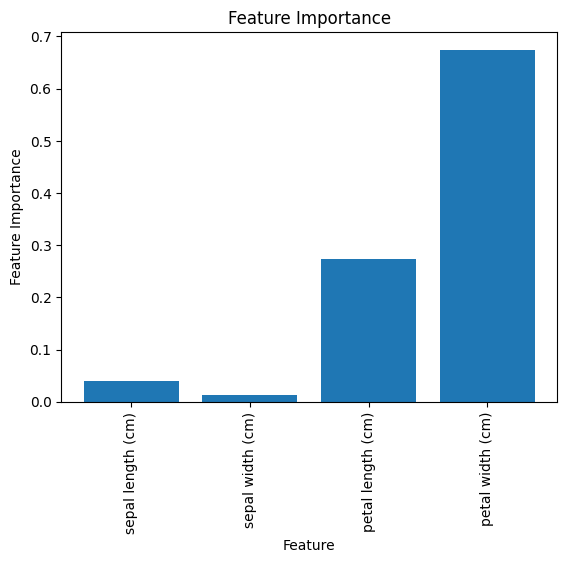

In [11]:
# Feature importance
plt.bar(range(len(my_tree.feature_importances)), 
        list(my_tree.feature_importances.values()), tick_label=iris_feature_names)
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.xticks(rotation=90)
plt.ylabel("Feature Importance")
plt.show()

In [12]:
# Running second decision tree script with parameters for prioritizing morphological features
import pandas as pd
import numpy as np
from sklearn import datasets, model_selection, metrics
from decision_tree_v2 import DecisionTree

# Define feature indices
morphological_features = ['Cystic',
 'Tubular',
 'Tubulocystic',
 'Cribriform/Adenocarcinoma-like',
 'Sieve-like with crystals',
 'Solid/Nested',
 'Papillary/Tubulopapillary',
 'Infiltrative',
 'Clear cells',
 'Eosinophilic cells',
 'Basophilic',
 'Spindle Shaped',
 'Low',
 'High',
 'Inclusion-like nucleoli',
 'Nuclei in reverse polarity',
 'Raisinoid nuclei with perinuclear halo',
 'Clear granular cytoplasm',
 'Plant-like cell membrane',
 'Basophilic stippling',
 'Thick fibromuscular stroma',
 'Desmoplastic stroma',
 'Foamy macrophages',
 'Mucin',
 'Calcium oxalate crystals',
 'End-stage renal disease background',
 'True Necrosis']

# Define IHC markers for each subtype (~5 markers per subtype)
ihc_feature_map = {
    "Clear cell papillary renal cell tumour w/ clear cell" : ["CAIX", "CD10", "CK7", "AMACR", "GATA3"], 
    "Clear cell RCC": ["CAIX", "CD10", "CK7", "AMACR"],
    "ELOC-mutated RCC / RCC with fibromyomatous stroma" : ["CAIX", "CD10", "CK7", "AMACR", "GATA3"], 
    "Multilocular cystic renal neoplasm of low malignant potential" : ["CAIX", "CD10", "CK7", "GATA3"],
    "TFE3-rearranged RCC" : ["CAIX", "TFE3", "LMWCK", "CD10"], 
    "Papillary RCC" : ["AMACR", "CK7", "CAIX", "LMWCK", "TFE3"]
}

subtypes_w_pri_IHC = ["Clear cell papillary renal cell tumour w/ clear cell", 
                      "Clear cell RCC",
                      "ELOC-mutated RCC / RCC with fibromyomatous stroma",
                      "Multilocular cystic renal neoplasm of low malignant potential",
                      "TFE3-rearranged RCC w/ high grade papillary",
                      "Papillary RCC w/ clear cell"]

df = pd.read_csv('synth_ds_6subtypes_w_priority_IHC.csv')
#df = df.drop(columns=['Unnamed: 0'])

# Create tree
dt = DecisionTree(
    max_depth=8,
    morphological_depth=3,  # Use only morphological features for depths 0-3
    morphological_features=morphological_features,
    ihc_feature_map=ihc_feature_map
)

# Separate features (X) and target (Y)
# Assuming 'Subtype' is your target column
Y = np.array(df["Subtype"])
X = np.array(df.drop(columns=["Subtype"]))

# Get feature names (all columns except Subtype)
feature_names = df.drop(columns=["Subtype"]).columns.tolist()

print(f"\nTarget classes: {np.unique(Y)}")
print(f"Number of features: {len(feature_names)}")
print(f"Feature names: {feature_names}")

# Train/test split
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=0)
print(f"\nTrain Shape: {X_train.shape}")
print(f"Test Shape: {X_test.shape}")



Target classes: ['Clear cell RCC' 'Clear cell papillary renal cell tumour w/ clear cell'
 'ELOC-mutated RCC / RCC with fibromyomatous stroma'
 'Multilocular cystic renal neoplasm of low malignant potential'
 'Papillary RCC w/ clear cell'
 'TFE3-rearranged RCC w/ high grade papillary']
Number of features: 51
Feature names: ['Cystic', 'Tubular', 'Tubulocystic', 'Cribriform/Adenocarcinoma-like', 'Sieve-like with crystals', 'Solid/Nested', 'Infiltrative', 'Clear', 'Eosinophilic', 'Basophilic', 'Spindle Shaped', 'Low', 'High', 'Inclusion-like nucleoli', 'Nuclei in reverse polarity', 'Thick fibromuscular stroma', 'Desmoplastic stroma', 'Mucin', 'Calcium oxalate crystals', 'End-stage renal disease background', 'True Necrosis', 'PAX8', 'CAIX', 'CD10', 'CK7', 'AMACR', 'CD117', 'Vimentin', 'TFE3', 'Cathepsin K', 'HMB45', 'Melan A', 'FH', '2SC', 'SDHB', 'ALK', 'SMARCB1 (INI1)', 'OCT 3/4', 'GATA3', 'CK20', 'CK-Pan ', 'EMA', 'LMWCK', 'WT1', 'CD57', 'Ki67 labelling index (%)', 'p63', 'PAX2', 'ER', 

In [ ]:
# Building the tree
my_tree = DecisionTree(max_depth=5, 
                       min_samples_leaf=5, 
                       min_information_gain=0.05)
my_tree.train(X_train, Y_train)

# Let's see the tree
my_tree.print_tree()

# Get feature usage report to see gating behavior
usage_report = my_tree.get_feature_usage_report()
print(usage_report)


DECISION TREE STRUCTURE

                                                                                -> LEAF | Label Counts = Clear cell RCC->23, TFE3-rearranged RCC w/ high grade papillary->3 | Pred Probs = [0.88461538 0.         0.         0.         0.         0.11538462]
                                                                -> NODE | Information Gain = 0.7889406572966209 | Split IF X[1] < 1.0 THEN left O/W right
                                                                                -> LEAF | Label Counts = ELOC-mutated RCC / RCC with fibromyomatous stroma->84 | Pred Probs = [0. 0. 1. 0. 0. 0.]
                                                -> NODE | Information Gain = 0.7420645707877058 | Split IF X[0] < 1.0 THEN left O/W right
                                                                                -> LEAF | Label Counts = Clear cell RCC->10, TFE3-rearranged RCC w/ high grade papillary->1 | Pred Probs = [0.90909091 0.         0.         0.         0

In [14]:
from decision_tree_v2 import DecisionTree

In [15]:
# Get a comprehensive summary
my_tree.print_summary(feature_names=feature_names)

# View the tree structure
my_tree.print_tree(feature_names=feature_names)


DECISION TREE SUMMARY

Tree Depth: 5
Number of Leaves: 17
Number of Internal Nodes: 16

--------------------------------------------------------------------------------
FEATURE IMPORTANCE (normalized)
--------------------------------------------------------------------------------
  CAIX                          : █████████████0.2682
  Nuclei in reverse polarity    : ████████0.1745
  TFE3                          : ███████0.1587
  Tubular                       : ██████0.1331
  AMACR                         : █████0.1049
  Cystic                        : ███0.0702
  LMWCK                         : ██0.0435
  Vimentin                      : 0.0123
  True Necrosis                 : 0.0111
  CK-Pan                        : 0.0083

--------------------------------------------------------------------------------
FEATURE USAGE IN TREE
--------------------------------------------------------------------------------
  LMWCK                         : Used 4 times
  Cystic                       